<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0">Introduction</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-1">Objective</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2">EDA</a></span></li><li><span><a href="#Pre-Processing" data-toc-modified-id="Pre-Processing-3">Pre Processing</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4">Vectorization</a></span></li><li><span><a href="#Splitting-our-data-and-training-our-models" data-toc-modified-id="Splitting-our-data-and-training-our-models-5">Splitting our data and training our models</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-6">Findings</a></span></li><li><span><a href="#Saving-our-model" data-toc-modified-id="Saving-our-model-7">Saving our model</a></span></li><li><span><a href="#Reccomendations-and-conclusion" data-toc-modified-id="Reccomendations-and-conclusion-8">Reccomendations and conclusion</a></span></li></ul></div>

## Introduction

"Dis mos lekker in Mzansi"! You'd be forgiven for assuming that previous message was from a single language, but it's actually two languages (You can make it 3 if you'd like the "in" to be English). Those languages are Afrikaans, which 13.5% of the South African population speaks, and Isizulu, where we get the word Mzansi (more on the breakdown of languages spoken in south africa [Here](https://southafrica-info.com/arts-culture/11-languages-south-africa/)).

![South Africa Introduction](https://www.expatica.com/app/uploads/sites/12/2014/05/south-africa.jpg)

## Objective

Our task will be an interesting one: training a model that classifies which one of South Africa's language's 11 official langages a given text is written in. To do that we'll need to import several python packages

In [85]:
# importing pandas to interact with dataframes
import pandas as pd

# Importing packages to engage in natural langage proccessing
import nltk

# Package that allows us to tokenize our textual data
from nltk.tokenize import word_tokenize

# Importing a package that will give us access to stop words
from nltk.corpus import stopwords

# Import a package that will let us stemmatize words
from nltk.stem import SnowballStemmer


# import a package which will display words in a word cloud
from wordcloud import WordCloud

# Package which will assist with visualizing our data
import matplotlib.pyplot as plt

#commands which will download 'punkt' and 'stopwords' respectively should they not be installed on your computer
nltk.download('punkt')
nltk.download('stopwords')

# Array of Scikitlearn modules used for training our models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# time package will allow us to get the training time on our models
import time

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bchok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bchok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's load our train and data sets before starting our exploratory data analysis

In [86]:
# Load the datasets
train_data = pd.read_csv('train_set.csv')
test_data = pd.read_csv('test_set.csv')

## EDA

In [87]:
#view our train data
train_data.head(5)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


We can see there are two columns, a lang_id column, with labels containing the respective language the text belongs to, and the text column which contains the classified texts

In [88]:
train_data['lang_id'].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

We also see there are 3000 observations of each of the official languages. there will be no need to balance our data set as there are an equal number of observations in the column

In [89]:
#view our test data
test_data.head(5)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


Above, we can see that our test data also contains two columns: an index column and the text data. The index column keeps track of the count of observations. before moving on, let's see how many observations we have in each of the sets

In [90]:
#View the shape of our train and test sets

print(train_data.shape)
print(test_data.shape)

(33000, 2)
(5682, 2)


Before pre processing our data let's have a look at a wordlcoud of our data. Wordclouds allow us to vizualize the most common words in our data, indicated by their colour (which will alert us to which language the word is from) as well as their size (the bigger the word, the more common it is)

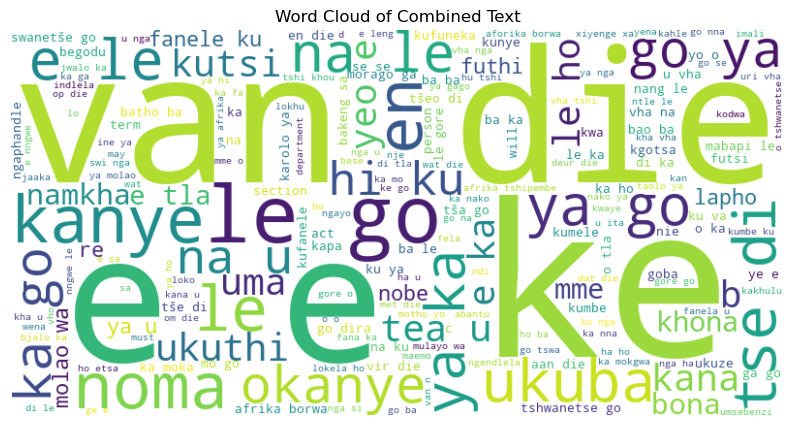

In [91]:
# Combine text from different languages for visualization
combined_text = ' '.join(train_data['text'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Text')
plt.show()

initial findings of our words here show that most of our data seems to be in Afrikaans, as well as the sotho-tswana-pedi language groups and Izisulu too. let us see what the sample size for each of these languages in our train set is

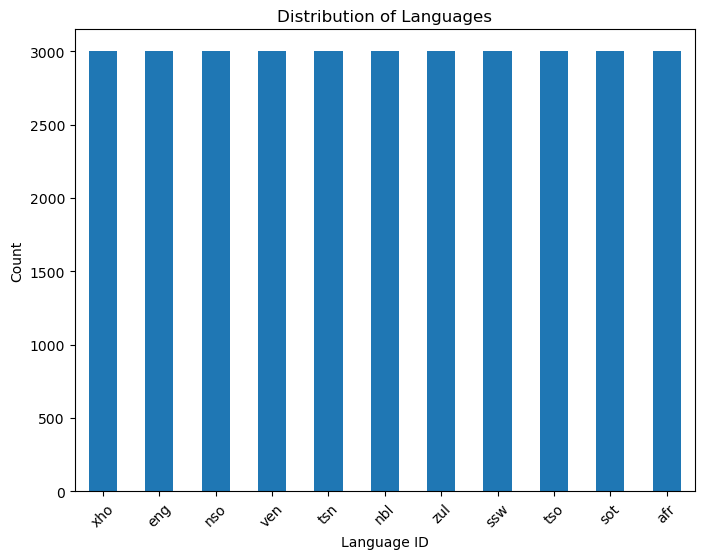

In [92]:
# Visualize distribution of languages
language_counts = train_data['lang_id'].value_counts()

plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We've already noted that there are 3000 observations in the lang_id column but visualizing it helps us understand things a bit better :) now, fo the preprocessing of our text data

## Pre Processing

Pre Processing is something we do to insure uniformity across our data before conducting any train-test splits and training/fitting of models. One common method of pre processing for text data is to remove stop words, which often act as noise in a text and don't add much meaning, and can obscure our results if left unchecked. 

Before we remove our stop words and stem them, let's tokenize our data!

Tokenization is a means of transforming our text data into seperate words. paired with the removal of stop words, what we have left are lists of words that get stemmed (stemming a word breaks a word down to it's core by stripping prefixes and suffixes)

In [93]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))  # You can expand this with other languages' stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = SnowballStemmer('english')  # You can use language-specific stemmers here
    stemmed = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(stemmed)

# Apply preprocessing to the text data
train_data['clean_text'] = train_data['text'].apply(preprocess_text)
test_data['clean_text'] = test_data['text'].apply(preprocess_text)

## Vectorization

With that done, we can know vectorize our data

Vectorizing our data essentially turns our tokens into numerical data so that it may be fit into a model going forward (machine learning models can only be trained on numerical values). With this specific vectorizer, TfIDF (which stands for Term Frequency - Inverse Document Frequency) counts up the occurences of a word in a document, as well as the entire collection of our data, and divides it by the total number of words in a document. It attempts to see how important a word in a document as well as its importance within the entire data set. the mathematical formula is below, where "t" is the term, and "d" is the document

                                         TF-IDF(t,d)=TF(t,d)×IDF(t)



In [94]:
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(train_data['clean_text'])
X_test = tfidf.transform(test_data['clean_text'])

## Splitting our data and training our models

time to split our data. Always need to split our data before training a model. common values for train test splits are 80% for the training, and 20% for the test

In [100]:
# Define target variable
y = train_data['lang_id']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Time time instantialize several models and see which of these produces the better results 

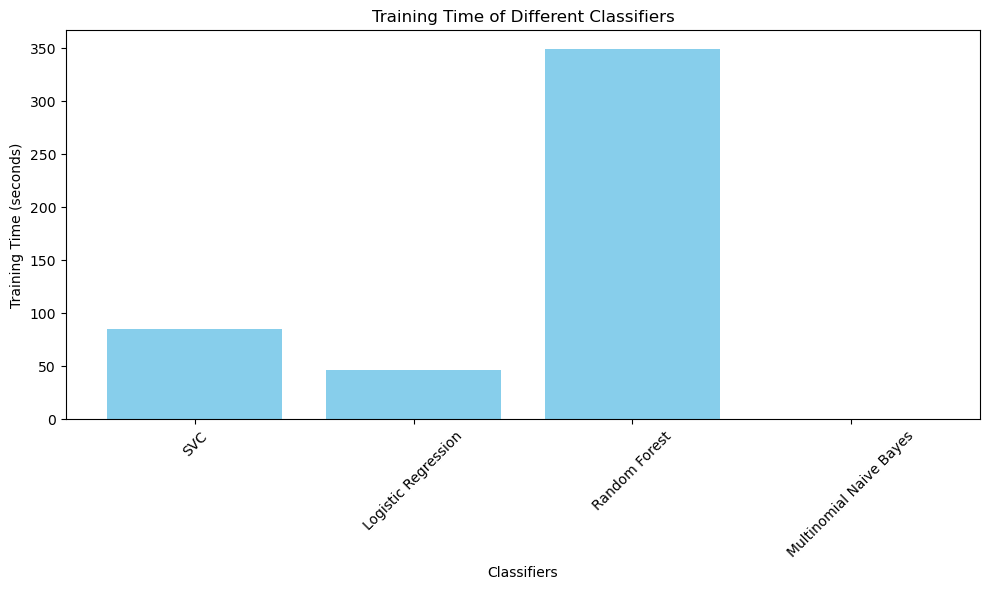

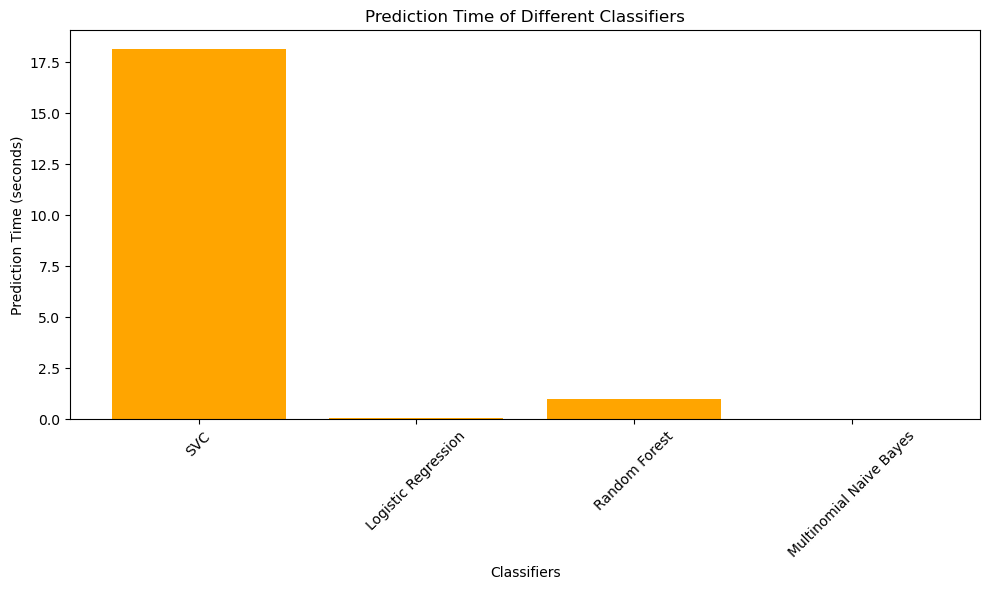

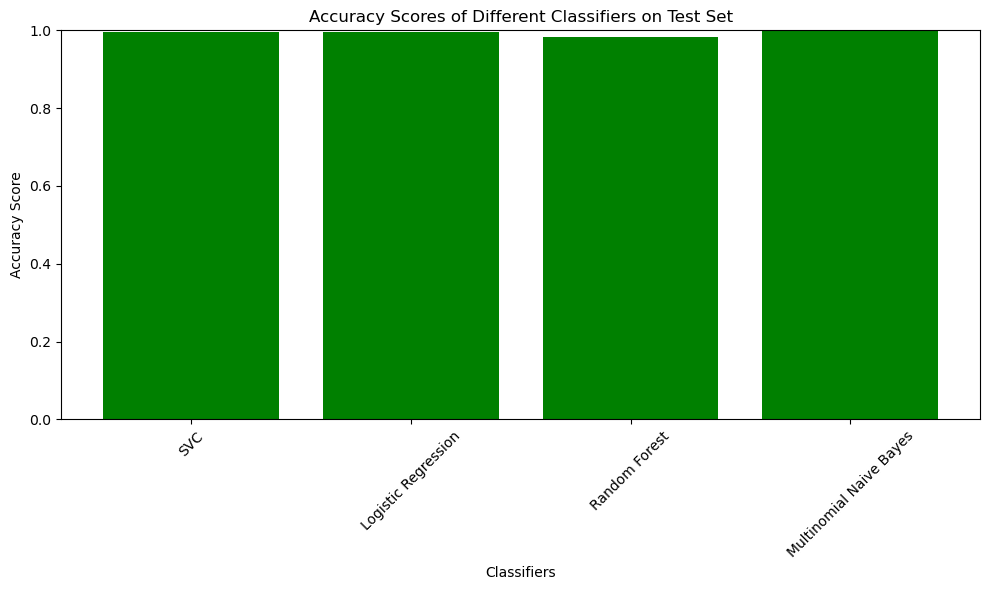

In [101]:
# Initialize different classifiers
classifiers = {
    'SVC': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Multinomial Naive Bayes': MultinomialNB(),
}

# Train each classifier, make predictions on the test set, and measure training/prediction times
training_times = {}
prediction_times = {}
accuracy_scores = {}
for clf_name, clf in classifiers.items():
    start_time = time.time()  # Record start time
    clf.fit(X_train, y_train)  # Train the classifier
    end_time = time.time()  # Record end time
    training_time = end_time - start_time  # Calculate training time
    training_times[clf_name] = training_time
    
    start_time = time.time()  # Record start time for prediction
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    end_time = time.time()  # Record end time for prediction
    prediction_time = end_time - start_time  # Calculate prediction time
    prediction_times[clf_name] = prediction_time
    
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy on the test set
    accuracy_scores[clf_name] = accuracy

# Plotting training time
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Different Classifiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting prediction time
plt.figure(figsize=(10, 6))
plt.bar(prediction_times.keys(), prediction_times.values(), color='orange')
plt.xlabel('Classifiers')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time of Different Classifiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting accuracy score
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='green')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers on Test Set')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# After evaluating, choose the best-performing model for making predictions on the test set
best_classifier = classifiers['Multinomial Naive Bayes']  # Change this based on the performance metrics observed

# Train the best classifier on the full training data
best_classifier.fit(X, y)

# Make predictions on the test set using the best model
test_predictions = best_classifier.predict(X_test)

## Findings

Regarding training time, we can see Random Forest took the longest, whilst Multiple Naive Bayes took the shortest time with Logistic regression taking almost a minute and SVC taking up close to a minute and a half

Regarding predictions, SVC performed sufficiently and on par with sme of the other models which scored perfectly on the validation set, it took the longest time to make predictions, at about 17.5 seconds, whereas random forest, which took the longest time to train, took about a second. The remaining models, logistic regression and multiple naive bayes, took much less time.

Finally, regarding the accuracy of our model: Multiple Naive Bayes got a perfect score for accuracy, with SVC and logistic regression slightly behind (the difference was so small it is difficult to see via the bar graph!). The model with the lowest accuracy score was the Random Forest classifier

## Saving our model

Below you'll find some code that'll allow us to save our model. the method used here takes the "best model" defined above, so changing the model that was passed into that line within the cell which we trained our models, will change the mdel being saved. Let's go ahead and save one of our best performing models, which was SVC

In [ ]:
# Prepare submission file
submission = pd.DataFrame({'index': test_data['index'], 'lang_id': test_predictions})
submission.to_csv('submission_best_model.csv', index=False)

## Reccomendations and conclusion

Having taken note of the model performance, it may be worthwhile to consider several factors when deploying this model or having it run within an app that'll be used by someone on the other end. For starters, the time it takes to make a prediction and the wait time experienced. Weighing that up against other important metrics, such as the F1 score and the accuracy are also important

More analysis may be needed to produce faster and more accurate predictions, so one additional reccomendation is to delve deeper into the data and moddeling process, such as hyper parameter turning, to improve on said results

To conclude, this would be brilliant as part of an application for people who might not know which of the 11 official languages they are looking at based on text data alone. It would also be a wonderful tool for people who are south african and want to expand on their knowledge of other languages, or at least how to identify them (just like our model did!)